In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Information About Dataset:

### The dataset of IPL From 2008 to 2022.

### Columns Information

* mid - match id
* date - when matches are played
* venue - place where matches aew played
* bat_team - batting team
* bowl_team - bowling team
* batsman - batsman
* bowler - bowler
* runs - runs scored
* wickets - wickets
* overs - overs - next 3 are based on this
* run_last_5 - runs scored in last 5 overs
* wicket_last_5 - wickets in last 5 overs
* stricker - batsman playing as main 1
* non-striker - batsman playing as runner up - not main 0
* total - total score (target variable)


# Our Aim is to predict the Total Score 

In [2]:
df = pd.read_csv('ipl_data.csv')
df

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129


In [3]:
df.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [4]:
#Here no null value found in column and which datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [5]:
df.nunique()

mid               617
date              442
venue              35
bat_team           14
bowl_team          14
batsman           411
bowler            329
runs              252
wickets            11
overs             140
runs_last_5       102
wickets_last_5      8
striker           155
non-striker        88
total             138
dtype: int64

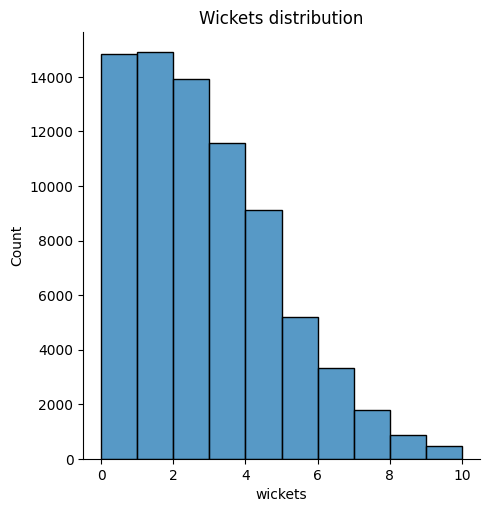

In [6]:
#here we see wickets over runs
sns.displot(df['wickets'],kde=False,bins=10)
plt.title('Wickets distribution')
plt.show()

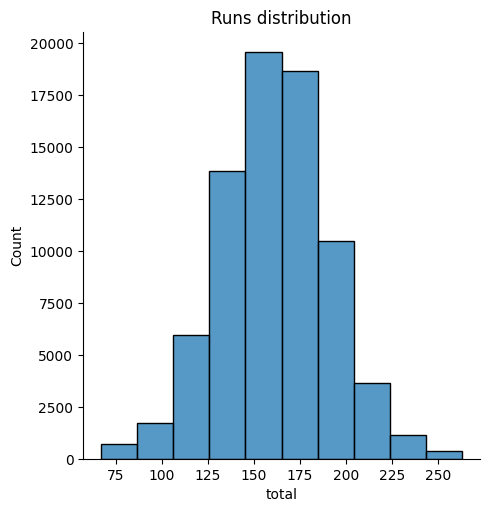

In [7]:
#here we see runs
sns.displot(df['total'],kde=False,bins=10)
plt.title('Runs distribution')
plt.show()

In [8]:
#we remove(drop) those columns which is not related to our AIM.
irrelevant_data =['mid','date','venue','batsman','bowler','striker','non-striker'] 
print(f'Before removing irrelevant data : {df.shape}')
df = df.drop(irrelevant_data,axis=1)
print(f'After removing irrelevant data : {df.shape}')
df.head()

Before removing irrelevant data : (76014, 15)
After removing irrelevant data : (76014, 8)


,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [9]:
df['bat_team'].unique()    

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [10]:
 df['bat_team'].value_counts()

Mumbai Indians                 10213
Kings XI Punjab                 9219
Chennai Super Kings             9142
Royal Challengers Bangalore     8331
Kolkata Knight Riders           8033
Delhi Daredevils                7152
Rajasthan Royals                6643
Deccan Chargers                 5280
Sunrisers Hyderabad             5216
Pune Warriors                   2448
Gujarat Lions                   1726
Rising Pune Supergiant           994
Kochi Tuskers Kerala             876
Rising Pune Supergiants          741
Name: bat_team, dtype: int64

In [11]:
df['bowl_team'].value_counts()

Delhi Daredevils               10245
Royal Challengers Bangalore     9661
Mumbai Indians                  9271
Kolkata Knight Riders           9211
Kings XI Punjab                 8405
Rajasthan Royals                7773
Chennai Super Kings             6497
Deccan Chargers                 3984
Sunrisers Hyderabad             3589
Pune Warriors                   3083
Gujarat Lions                   1970
Rising Pune Supergiant           962
Kochi Tuskers Kerala             736
Rising Pune Supergiants          627
Name: bowl_team, dtype: int64

In [12]:
# We take those teams which play consistent and long.total-10
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Pune Warriors', 'Sunrisers Hyderabad']

In [13]:
print(f'Before removing consistent_teams data : {df.shape}')
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]
print(f'After removing consistent_teams data : {df.shape}')
print(f"Consistent Teams:\n{df['bat_team'].unique()}")
df.head()

Before removing consistent_teams data : (76014, 8)
After removing consistent_teams data : (67872, 8)
Consistent Teams:
['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Deccan Chargers' 'Kings XI Punjab'
 'Royal Challengers Bangalore' 'Delhi Daredevils' 'Pune Warriors'
 'Sunrisers Hyderabad']


,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


<AxesSubplot:>

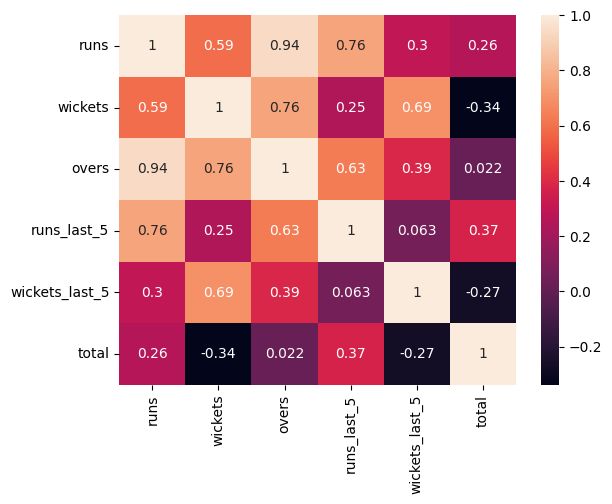

In [14]:
sns.heatmap(df.corr() ,annot=True)

In [15]:
#apply labelEncoder to bat_team and bowl_team--labelEncoder give numberwise for each unique bat_team and sames as bowl_team
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le = LabelEncoder()
for col in ['bat_team','bowl_team']:
    df[col] = le.fit_transform(df[col])
df.head()


,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,4,8,1,0,0.1,1,0,222
1,4,8,1,0,0.2,1,0,222
2,4,8,2,0,0.2,2,0,222
3,4,8,2,0,0.3,2,0,222
4,4,8,2,0,0.4,2,0,222


In [16]:
# to conver categorical into numerical
from sklearn.compose import ColumnTransformer
ColumnTransformer = ColumnTransformer([('encoder',OneHotEncoder(),[0,1])],remainder='passthrough')

In [17]:
df = np.array(ColumnTransformer.fit_transform(df))
df

array([[  0.,   0.,   0., ...,   1.,   0., 222.],
       [  0.,   0.,   0., ...,   1.,   0., 222.],
       [  0.,   0.,   0., ...,   2.,   0., 222.],
       ...,
       [  0.,   0.,   0., ...,  28.,   4., 107.],
       [  0.,   0.,   0., ...,  24.,   4., 107.],
       [  0.,   0.,   0., ...,  23.,   5., 107.]])

In [18]:
#here we create new DataFrame with Encode(all numerical columns)
cols = ['bating_team_Kolkata Knight Riders','bating_team_Chennai Super Kings','bating_team_Rajasthan Royals','bating_team_Mumbai Indians',
     'bating_team_Deccan Chargers', 'bating_team_Kings XI Punjab','bating_team_Royal Challengers Bangalore','bating_team_Delhi Daredevils','bating_team_Pune Warriors','bating_team_Sunrisers Hyderabad',
      'bowling_team_Kolkata Knight Riders','bowlinng_team_Chennai Super Kings','bowling_team_Rajasthan Royals','bowling_team_Mumbai Indians',
     'bowling_team_Deccan Chargers', 'bowling_team_Kings XI Punjab','bowling_team_Royal Challengers Bangalore','bowling_team_Delhi Daredevils','bowing_team_Pune Warriors','bowling_team_Sunrisers Hyderabad','runs','wickets','overs','run_last_5','wickets_last_5','total']
df = pd.DataFrame(df,columns=cols)

In [19]:
df

,bating_team_Kolkata Knight Riders,bating_team_Chennai Super Kings,bating_team_Rajasthan Royals,bating_team_Mumbai Indians,bating_team_Deccan Chargers,bating_team_Kings XI Punjab,bating_team_Royal Challengers Bangalore,bating_team_Delhi Daredevils,bating_team_Pune Warriors,bating_team_Sunrisers Hyderabad,...,bowling_team_Royal Challengers Bangalore,bowling_team_Delhi Daredevils,bowing_team_Pune Warriors,bowling_team_Sunrisers Hyderabad,runs,wickets,overs,run_last_5,wickets_last_5,total
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.1,1.0,0.0,222.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.2,1.0,0.0,222.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2.0,0.0,0.2,2.0,0.0,222.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2.0,0.0,0.3,2.0,0.0,222.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2.0,0.0,0.4,2.0,0.0,222.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67867,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,106.0,9.0,18.1,29.0,4.0,107.0
67868,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,107.0,9.0,18.2,29.0,4.0,107.0
67869,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,107.0,9.0,18.3,28.0,4.0,107.0
67870,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,107.0,9.0,18.4,24.0,4.0,107.0


In [20]:
features = df.drop(['total'],axis=1)#----->X(feature)
labels = df['total']#------------>Y(labels)

In [21]:
from sklearn.model_selection import train_test_split
train_features,test_features,train_labels,test_labels = train_test_split(features, labels, test_size=0.20, shuffle=True)
print(f"Training Set :{train_features.shape}\nTesting Set :{test_features.shape}")

Training Set :(54297, 25)
Testing Set :(13575, 25)


In [22]:
models = dict()

In [23]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()

tree.fit(train_features, train_labels)

DecisionTreeRegressor()

In [24]:
train_score_tree = str(tree.score(train_features, train_labels)*100)
test_score_tree = str(tree.score(train_features, train_labels)*100)
print(f'Train Score : {train_score_tree[:5]}%\nTest Score :{test_score_tree[:5]}%')
models["Tree"] = test_score_tree

Train Score : 97.53%
Test Score :97.53%


In [25]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
print("---- Decision Tree Regressor - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, tree.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, tree.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, tree.predict(test_features)))))

---- Decision Tree Regressor - Model Evaluation ----
Mean Absolute Error (MAE): 6.893066912216083
Mean Squared Error (MSE): 284.2783044658256
Root Mean Squared Error (RMSE): 16.860554690336425


In [26]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
# Train Model
linreg.fit(train_features, train_labels)

LinearRegression()

In [27]:
# Evaluate Model
train_score_linreg = str(linreg.score(train_features, train_labels) * 100)
test_score_linreg = str(linreg.score(test_features, test_labels) * 100)
print(f'Train Score : {train_score_linreg[:5]}%\nTest Score : {test_score_linreg[:5]}%')
models["linreg"] = test_score_linreg

Train Score : 53.30%
Test Score : 52.22%


In [28]:
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, linreg.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, linreg.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, linreg.predict(test_features)))))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 15.288450206103246
Mean Squared Error (MSE): 423.740209704643
Root Mean Squared Error (RMSE): 20.584951049362324


In [29]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
# Train Model
forest.fit(train_features, train_labels)

RandomForestRegressor()

In [30]:
# Evaluate Model
train_score_forest = str(forest.score(train_features, train_labels)*100)
test_score_forest = str(forest.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_forest[:5]}%\nTest Score : {test_score_forest[:5]}%')
models["forest"] = test_score_forest

Train Score : 95.74%
Test Score : 81.54%


In [31]:
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, forest.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, forest.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, forest.predict(test_features)))))

---- Random Forest Regression - Model Evaluation ----
Mean Absolute Error (MAE): 7.0397712801195125
Mean Squared Error (MSE): 163.65538637489897
Root Mean Squared Error (RMSE): 12.792786497667308


In [32]:
from sklearn.svm import SVR
svm = SVR()
# Train Model
svm.fit(train_features, train_labels)

SVR()

In [33]:
train_score_svm = str(svm.score(train_features, train_labels)*100)
test_score_svm = str(svm.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_svm[:5]}%\nTest Score : {test_score_svm[:5]}%')
models["svm"] = test_score_svm 

Train Score : 47.43%
Test Score : 46.62%


In [34]:
print("---- Support Vector Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, svm.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, svm.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, svm.predict(test_features)))))

---- Support Vector Regression - Model Evaluation ----
Mean Absolute Error (MAE): 16.142917912314203
Mean Squared Error (MSE): 473.3567447717838
Root Mean Squared Error (RMSE): 21.756763196114072


In [52]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
# Train Model
xgb.fit(train_features, train_labels)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [53]:
train_score_xgb = str(xgb.score(train_features, train_labels)*100)
test_score_xgb = str(xgb.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_xgb[:5]}%\nTest Score : {test_score_xgb[:5]}%')
models["xgb"] = test_score_xgb

Train Score : 76.09%
Test Score : 71.28%


In [54]:
print("---- XGB Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, xgb.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, xgb.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, xgb.predict(test_features)))))

---- XGB Regression - Model Evaluation ----
Mean Absolute Error (MAE): 11.21489413660095
Mean Squared Error (MSE): 254.6236077710698
Root Mean Squared Error (RMSE): 15.956929772705957


In [38]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
# Train Model
knr.fit(train_features, train_labels)

KNeighborsRegressor()

In [55]:
train_score_knr = str(knr.score(train_features, train_labels)*100)
test_score_knr = str(knr.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_knr[:5]}%\nTest Score : {test_score_knr[:5]}%')
models["knr"] = test_score_knr

Train Score : 79.22%
Test Score : 65.16%


In [56]:
print("---- KNR - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, knr.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, knr.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, knr.predict(test_features)))))

---- KNR - Model Evaluation ----
Mean Absolute Error (MAE): 12.043005524861877
Mean Squared Error (MSE): 308.9736103130755
Root Mean Squared Error (RMSE): 17.577645186801202


<BarContainer object of 6 artists>

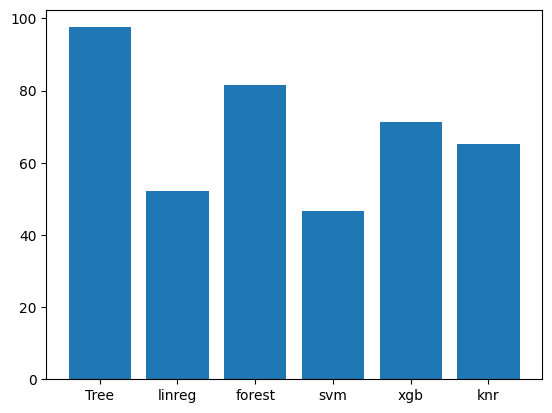

In [63]:
import matplotlib.pyplot as plt 
model_names = list(models.keys())
accuracy = list(map(float, models.values()))
# creating the bar plot
plt.bar(model_names, accuracy)

### from above graph, we see that Decision Tree performed best to predict total score

In [ ]:
###############understand how is the code work behind#################################### 

# def score_predict(batting_team, bowling_team, runs, wickets, overs, runs_last_5, wickets_last_5, model=tree):
#     prediction_array = []
#     # Batting Team
#     if batting_team == 'Kolkata Knight Riders':
#         prediction_array = prediction_array + [1,0,0,0,0,0,0,0,0,0]
#     elif batting_team == 'Chennai Super Kings':
#         prediction_array = prediction_array + [0,1,0,0,0,0,0,0,0,0]
#     elif batting_team == 'Rajasthan Royals':
#         prediction_array = prediction_array + [0,0,1,0,0,0,0,0,0,0]
#     elif batting_team == 'Mumbai Indians':
#         prediction_array = prediction_array + [0,0,0,1,0,0,0,0,0,0]
#     elif batting_team == 'Deccan Chargers':
#         prediction_array = prediction_array + [0,0,0,0,1,0,0,0,0,0]
#     elif batting_team == 'Kings XI Punjab':
#         prediction_array = prediction_array + [0,0,0,0,0,1,0,0,0,0]
#     elif batting_team == 'Royal Challengers Bangalore':
#         prediction_array = prediction_array + [0,0,0,0,0,0,1,0,0,0]
#     elif batting_team == 'Delhi Daredevils':
#         prediction_array = prediction_array + [0,0,0,0,0,0,0,1,0,0]
#     elif batting_team == 'Pune Warriorss':
#         prediction_array = prediction_array + [0,0,0,0,0,0,0,0,1,0]
#     elif batting_team == 'Sunrisers Hyderabad':
#         prediction_array = prediction_array + [0,0,0,0,0,0,0,0,0,1]
#     # Bowling Team
#     if bowling_team == 'Kolkata Knight Riders':
#         prediction_array = prediction_array + [1,0,0,0,0,0,0,0,0,0]
#     elif bowling_team == 'Chennai Super Kings':
#         prediction_array = prediction_array + [0,1,0,0,0,0,0,0,0,0]
#     elif bowling_team == 'Rajasthan Royals':
#         prediction_array = prediction_array + [0,0,1,0,0,0,0,0,0,0]
#     elif bowling_team == 'Mumbai Indians':
#         prediction_array = prediction_array + [0,0,0,1,0,0,0,0,0,0]
#     elif bowling_team == 'Deccan Chargers':
#         prediction_array = prediction_array + [0,0,0,0,1,0,0,0,0,0]
#     elif bowling_team == 'Kings XI Punjab':
#         prediction_array = prediction_array + [0,0,0,0,0,1,0,0,0,0]
#     elif bowling_team == 'Royal Challengers Bangalore':
#         prediction_array = prediction_array + [0,0,0,0,0,0,1,0,0,0]
#     elif bowling_team == 'Delhi Daredevils':
#         prediction_array = prediction_array + [0,0,0,0,0,0,0,1,0,0]
#     elif bowling_team == 'Pune Warriorss':
#         prediction_array = prediction_array + [0,0,0,0,0,0,0,0,1,0]
#     elif bowling_team == 'Sunrisers Hyderabad':
#         prediction_array = prediction_array + [0,0,0,0,0,0,0,0,0,1]
#     prediction_array = prediction_array + [runs, wickets, overs, runs_last_5, wickets_last_5]
#     prediction_array = np.array([prediction_array])
#     pred = model.predict(prediction_array)
#     return int(round(pred[0]))



def score_predict(batting_team, bowling_team, runs, wickets, overs, runs_last_5, wickets_last_5, model=forest):
    teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals', 'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab', 'Royal Challengers Bangalore', 'Delhi Daredevils', 'Pune Warriorss', 'Sunrisers Hyderabad']
    prediction_array = [int(batting_team==team) for team in teams] + [int(bowling_team==team) for team in teams] + [runs, wickets, overs, runs_last_5, wickets_last_5]
    pred = int(round(model.predict(np.array([prediction_array]))[0]))
    return pred


In [82]:
batting_team="Kings XI Punjab" #bat---teams=[0,0,0,0,0,1,0,0,0,0] +
bowling_team="Rajasthan Royals"#bowl--teams=[0,0,1,0,0,0,0,0,0,0]
score =score_predict(batting_team, bowling_team, overs=14.0, runs=118, wickets=1, runs_last_5=45, wickets_last_5=0)
print(f'Predicted Score : {score} || Actual Score : 185')


Predicted Score : 185 || Actual Score : 185


In [85]:
batting_team="Kolkata Knight Riders"
bowling_team="Chennai Super Kings"
score = score_predict(batting_team, bowling_team, overs=18.0, runs=150, wickets=4, runs_last_5=57, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 172')

Predicted Score : 177 || Actual Score : 172


In [83]:
batting_team='Kings XI Punjab'
bowling_team='Chennai Super Kings'
score = score_predict(batting_team, bowling_team, overs=18.0, runs=129, wickets=6, runs_last_5=34, wickets_last_5=2)
print(f'Predicted Score : {score} || Actual Score : 153')

Predicted Score : 154 || Actual Score : 153


In [81]:
batting_team='Sunrisers Hyderabad'
bowling_team='Royal Challengers Bangalore'
score = score_predict(batting_team, bowling_team, overs=10.5, runs=67, wickets=3, runs_last_5=29, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 146')

Predicted Score : 139 || Actual Score : 146


In [84]:
batting_team='Mumbai Indians'
bowling_team='Kings XI Punjab'
score = score_predict(batting_team, bowling_team, overs=12.3, runs=113, wickets=2, runs_last_5=55, wickets_last_5=0)
print(f'Predicted Score : {score} || Actual Score : 176')

Predicted Score : 199 || Actual Score : 176


In [86]:
batting_team='Delhi Daredevils'
bowling_team='Mumbai Indians'
score = score_predict(batting_team, bowling_team, overs=18.0, runs=96, wickets=8, runs_last_5=18, wickets_last_5=4)
print(f'Predicted Score : {score} || Actual Score : 110')

Predicted Score : 108 || Actual Score : 110


In [87]:
batting_team='Delhi Daredevils'
bowling_team='Chennai Super Kings'
score = score_predict(batting_team, bowling_team, overs=10.2, runs=68, wickets=3, runs_last_5=29, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 147')

Predicted Score : 126 || Actual Score : 147


In [50]:
import os
os.getcwd()

'C:\\Users\\Kapil'

In [51]:
import pickle
filename = "ml_model.pkl"
pickle.dump(forest, open(filename, "wb"))